# Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Data Loading

In [2]:
Data = pd.read_csv("D:\\II - Machine Learning Workshop\\Data sets\\ship_fuel_efficiency.CSV")
Data.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


# Data Cleaning

In [3]:
Data.isna().sum()

ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64

In [4]:
Data.duplicated().sum()

0

In [5]:
Data['ship_type'].value_counts()

ship_type
Oil Service Boat    408
Tanker Ship         408
Surfer Boat         324
Fishing Trawler     300
Name: count, dtype: int64

In [6]:
Data['fuel_type'].value_counts()

fuel_type
Diesel    899
HFO       541
Name: count, dtype: int64

# Visulaisation

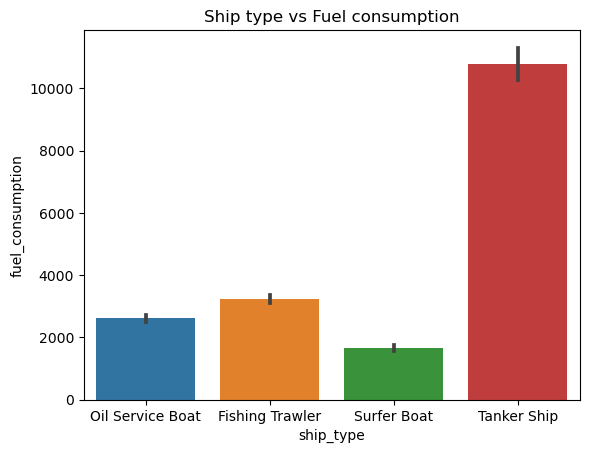

In [7]:
sns.barplot(data=Data,x="ship_type" , y="fuel_consumption")
plt.title("Ship type vs Fuel consumption")
plt.show()

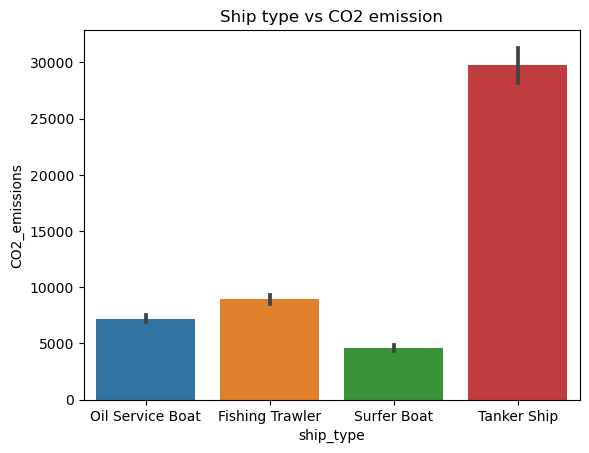

In [8]:
sns.barplot(data=Data,x="ship_type" , y="CO2_emissions")
plt.title("Ship type vs CO2 emission")
plt.show()

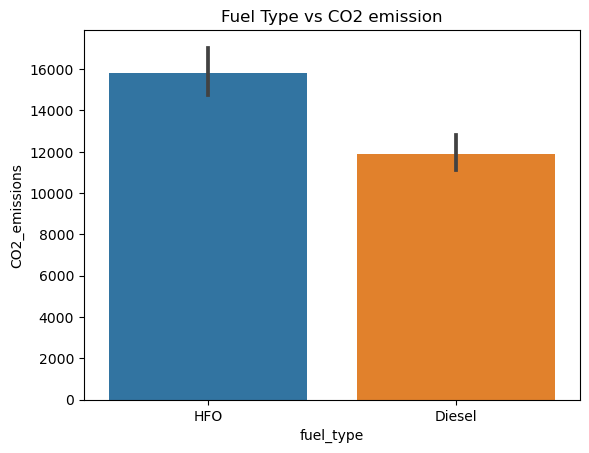

In [9]:
sns.barplot(data=Data,x="fuel_type" , y="CO2_emissions")
plt.title("Fuel Type vs CO2 emission")
plt.show()

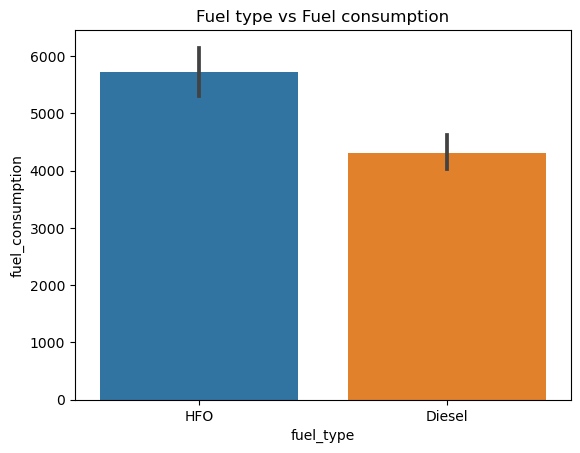

In [10]:
sns.barplot(data=Data,x="fuel_type" , y="fuel_consumption")
plt.title("Fuel type vs Fuel consumption")
plt.show()

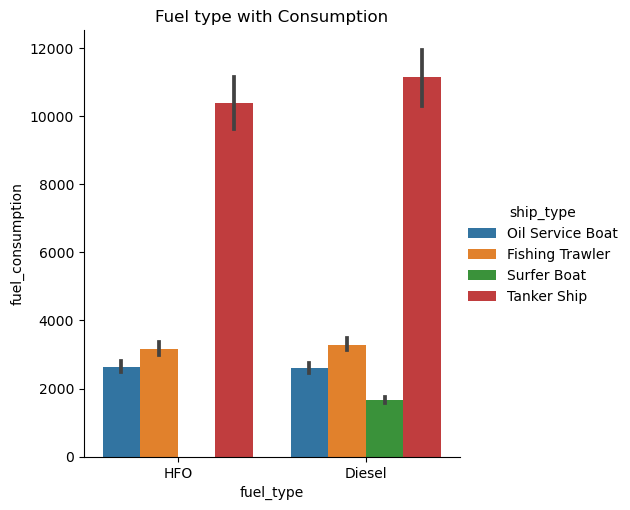

In [11]:
sns.catplot(data=Data,x="fuel_type",y="fuel_consumption",hue="ship_type",kind="bar")
plt.title("Fuel type with Consumption")
plt.show()

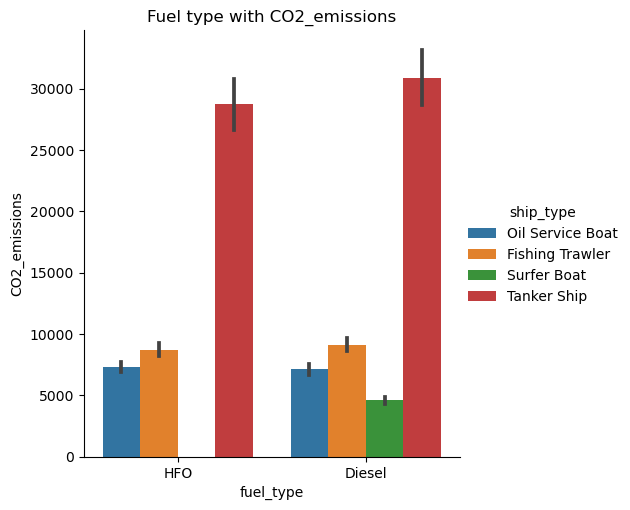

In [12]:
sns.catplot(data=Data,x="fuel_type",y="CO2_emissions",hue="ship_type",kind="bar")
plt.title("Fuel type with CO2_emissions")
plt.show()

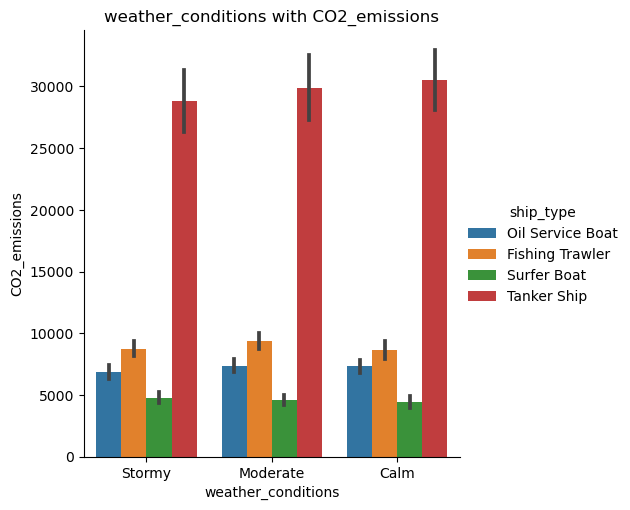

In [13]:
sns.catplot(data=Data,x="weather_conditions",y="CO2_emissions",hue="ship_type",kind="bar")
plt.title("weather_conditions with CO2_emissions")
plt.show()

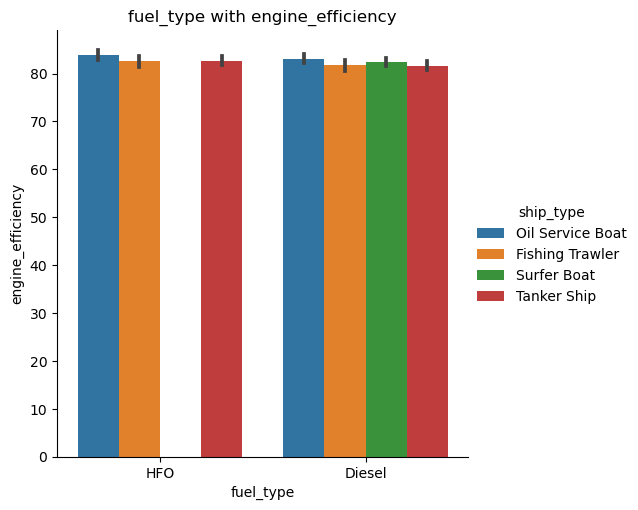

In [14]:
sns.catplot(data=Data,x="fuel_type",y="engine_efficiency",hue="ship_type",kind="bar")
plt.title("fuel_type with engine_efficiency")
plt.show()

C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

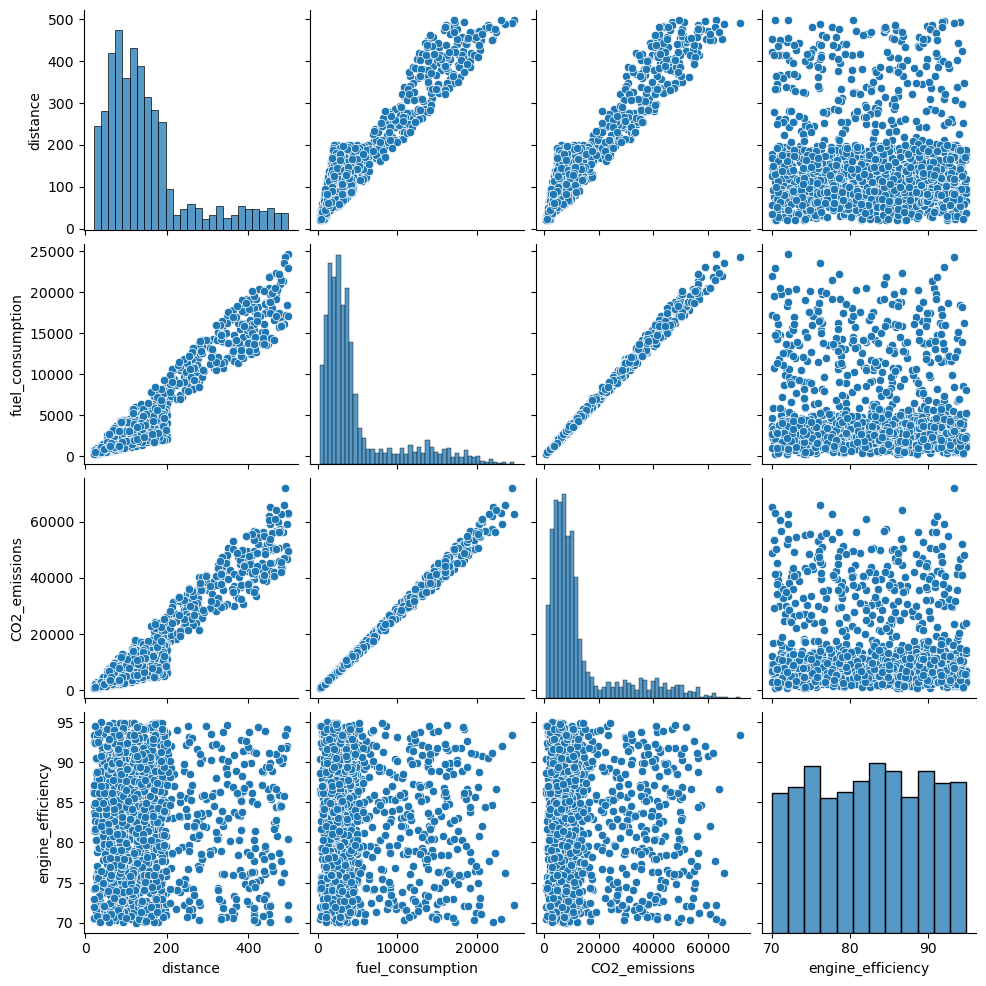

In [15]:
sns.pairplot(Data)
plt.show()

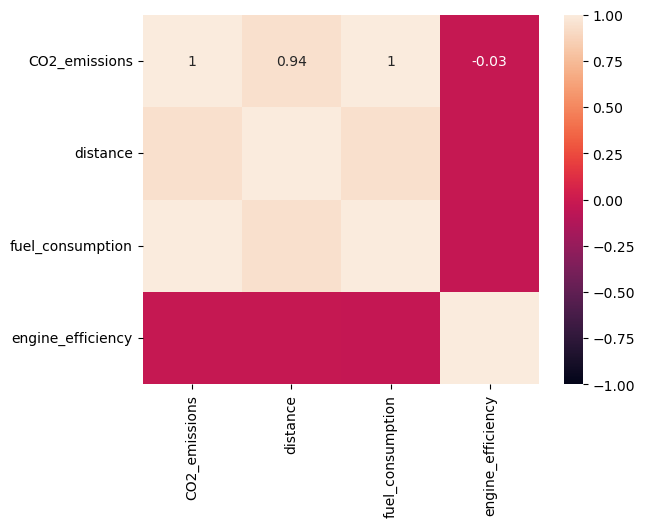

In [16]:
df=Data[['CO2_emissions','distance','fuel_consumption','engine_efficiency']]
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [17]:
data_num = Data[["distance","fuel_consumption","engine_efficiency","CO2_emissions"]]
data_num.head()

,distance,fuel_consumption,engine_efficiency,CO2_emissions
0,132.26,3779.77,92.14,10625.76
1,128.52,4461.44,92.98,12779.73
2,67.30,1867.73,87.61,5353.01
3,71.68,2393.51,87.42,6506.52
4,134.32,4267.19,85.61,11617.03


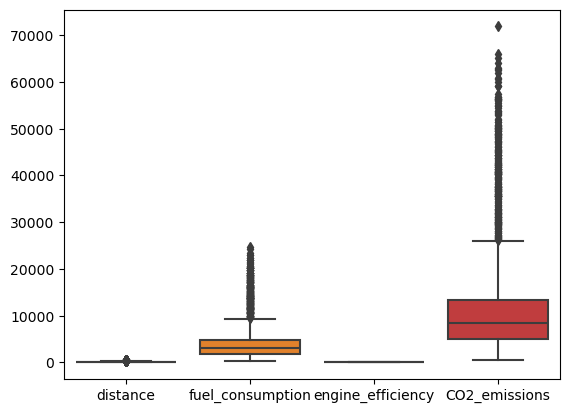

In [18]:
# With outliers
sns.boxplot(data_num)
plt.show()

# Removing Outliers

In [19]:
q1 = data_num.quantile(0.25)
q3 = data_num.quantile(0.75)
iqr = q3-q1
out_rows = ((data_num < (q1 - 1.5*iqr)) | (data_num > (q3 + 1.5*iqr))).any(axis=1) 
data_num = data_num[~out_rows]
data_num.head()

,distance,fuel_consumption,engine_efficiency,CO2_emissions
0,132.26,3779.77,92.14,10625.76
1,128.52,4461.44,92.98,12779.73
2,67.30,1867.73,87.61,5353.01
3,71.68,2393.51,87.42,6506.52
4,134.32,4267.19,85.61,11617.03


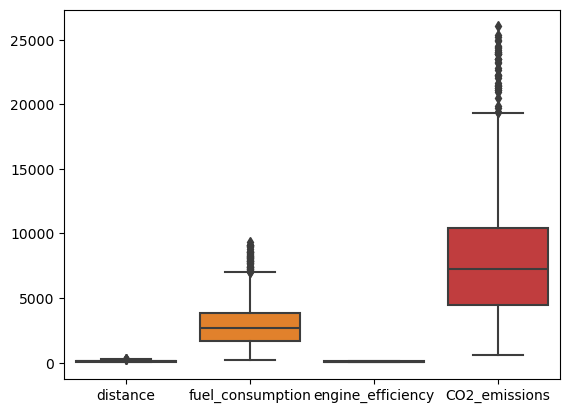

In [20]:
# Without ouliers
sns.boxplot(data_num)
plt.show()

In [21]:
data_num.describe()

,distance,fuel_consumption,engine_efficiency,CO2_emissions
count,1206.000000,1206.000000,1206.000000,1206.000000
mean,110.985887,2900.923167,82.703408,7983.459784
std,50.313213,1689.982193,7.159700,4715.403877
min,20.080000,237.880000,70.010000,615.680000
25%,70.722500,1656.392500,76.345000,4495.545000
50%,109.900000,2669.920000,82.880000,7249.260000
75%,147.142500,3805.177500,88.947500,10441.962500
max,279.880000,9328.950000,94.980000,26043.450000


# Data Standardisation

In [22]:
data_num=StandardScaler().fit_transform(data_num)
data_num=pd.DataFrame(data_num,columns=["distance","fuel_consumption","engine_efficiency","CO2_emissions"])

In [23]:
x=data_num.iloc[:,:3]
y=data_num.iloc[:,3]

# Split Data

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=True)

# Data fitting for Different models

# Linear Regression

In [25]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

In [51]:
MAE1 = mean_absolute_error(y_pred1,y_test)
RMSE1 = np.sqrt(mean_squared_error(y_pred1,y_test))
R2_1 = r2_score(y_pred1,y_test)

# Random Forest Regressor 

In [27]:
model2 = RandomForestRegressor()

# Parameters Optimisation

In [28]:
params={"n_estimators":[50,100,150,200,250,300,350,400,450,500],"criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"]}
cv=KFold(n_splits=10,shuffle=True)

In [29]:
gsearch=GridSearchCV(model2,params,cv=cv)
results=gsearch.fit(x_train,y_train)
results.best_params_

C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 373, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarn

{'criterion': 'friedman_mse', 'n_estimators': 100}

In [42]:
model2 = RandomForestRegressor(n_estimators=100,criterion='friedman_mse')
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [53]:
MAE2 = mean_absolute_error(y_pred2,y_test)
RMSE2 = np.sqrt(mean_squared_error(y_pred2,y_test))
R2_2 = r2_score(y_pred2,y_test)

# Extremely randomized trees

In [32]:
model3=ExtraTreesRegressor()

In [33]:
params={"n_estimators":[50,100,150,200,250,300,350,400,450,500],"criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"]}
cv=KFold(n_splits=10,shuffle=True)

In [34]:
gsearch=GridSearchCV(model3,params,cv=cv)
results=gsearch.fit(x_train,y_train)
results.best_params_

C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tharusha Kamalanath\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 373, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarn

{'criterion': 'absolute_error', 'n_estimators': 400}

In [35]:
model3=ExtraTreesRegressor(n_estimators=400,criterion='absolute_error')
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [54]:
MAE3 = mean_absolute_error(y_pred3,y_test)
RMSE3 = np.sqrt(mean_squared_error(y_pred3,y_test))
R2_3 = r2_score(y_pred3,y_test)

# Decision Tree Regressor 

In [37]:
model4 = DecisionTreeRegressor()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [55]:
MAE4 = mean_absolute_error(y_pred4,y_test)
RMSE4=  np.sqrt(mean_squared_error(y_pred4,y_test))
R2_4 = r2_score(y_pred4,y_test)

# XGBoost Regressor 

In [39]:
model5 = XGBRegressor()
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)

In [56]:
MAE5 = mean_absolute_error(y_pred5,y_test) 
RMSE5 = np.sqrt(mean_squared_error(y_pred5,y_test))
R2_5 = r2_score(y_pred5,y_test)

# Comparision Models

In [63]:
comparision = pd.DataFrame({"Model" : ["Linear Regression","Random Forest","Extremely randomized trees","Decision Tree","XGBoost"] , 
                            "MAE" : [MAE1,MAE2,MAE3,MAE4,MAE5],
                            "RMSE" : [RMSE1,RMSE2,RMSE3,RMSE4,RMSE5], 
                            "R2" : [R2_1,R2_2,R2_3,R2_4,R2_5]})

In [64]:
comparision

,Model,MAE,RMSE,R2
0,Linear Regression,0.081798,0.107261,0.988122
1,Random Forest,0.083240,0.115020,0.986077
2,Extremely randomized trees,0.088370,0.120541,0.984794
3,Decision Tree,0.109429,0.159623,0.973506
4,XGBoost,0.086956,0.120757,0.985138
